In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import networkx as nx
import time
from math import sqrt
import random
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Load dataset
df_data = pd.read_csv("/content/Updated_Speed_Limits_with_Duration.csv")

In [ ]:
df_data

,start_node,end_node,paths,speed_limit_kph,distance_meters,duration_seconds,route,is_signed,is_blocked
0,"(40.817387, -73.925413)","(40.817501, -73.925585)",unnamed roads,25,20.1168,2.896819,ambulance entrance,emergency,0
1,"(40.817501, -73.925585)","(40.817980, -73.925216)",park avenue,30,60.9600,7.315200,street,oneway,0
2,"(40.817980, -73.925216)","(40.819259, -73.924069)",park avenue,30,160.9340,19.312080,street,oneway,0
3,"(40.819259, -73.924069)","(40.820560, -73.922594)",park avenue,30,160.9340,19.312080,street,oneway,0
4,"(40.820560, -73.922594)","(40.821551, -73.921220)",park avenue,30,160.9340,19.312080,street,oneway,0
...,...,...,...,...,...,...,...,...,...
80,"(40.819369, -73.918289)","(40.820204, -73.921469)",153rd street,30,321.8690,38.624280,street,oneway,0
81,"(40.822254, -73.920331)","(40.821293, -73.917428)",156th street,30,321.8690,38.624280,street,oneway,0
82,"(40.823386, -73.918344)","(40.822825, -73.916582)",158th street,30,160.9340,19.312080,street,oneway,0
83,"(40.823472, -73.916221)","(40.823892, -73.917575)",159th street,30,123.1390,14.776680,street,oneway,0


In [ ]:
# Drop unnecesarry columsn
df = df_data.drop(columns=['paths', 'route'])

In [ ]:
df

,start_node,end_node,speed_limit_kph,distance_meters,duration_seconds,is_signed,is_blocked
0,"(40.817387, -73.925413)","(40.817501, -73.925585)",25,20.1168,2.896819,emergency,0
1,"(40.817501, -73.925585)","(40.817980, -73.925216)",30,60.9600,7.315200,oneway,0
2,"(40.817980, -73.925216)","(40.819259, -73.924069)",30,160.9340,19.312080,oneway,0
3,"(40.819259, -73.924069)","(40.820560, -73.922594)",30,160.9340,19.312080,oneway,0
4,"(40.820560, -73.922594)","(40.821551, -73.921220)",30,160.9340,19.312080,oneway,0
...,...,...,...,...,...,...,...
80,"(40.819369, -73.918289)","(40.820204, -73.921469)",30,321.8690,38.624280,oneway,0
81,"(40.822254, -73.920331)","(40.821293, -73.917428)",30,321.8690,38.624280,oneway,0
82,"(40.823386, -73.918344)","(40.822825, -73.916582)",30,160.9340,19.312080,oneway,0
83,"(40.823472, -73.916221)","(40.823892, -73.917575)",30,123.1390,14.776680,oneway,0


In [ ]:
# Data Visualization
# Set style for plots
sns.set_theme(style="whitegrid")

/tmp/ipython-input-8-3556466944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='speed_limit_kph', palette='viridis')


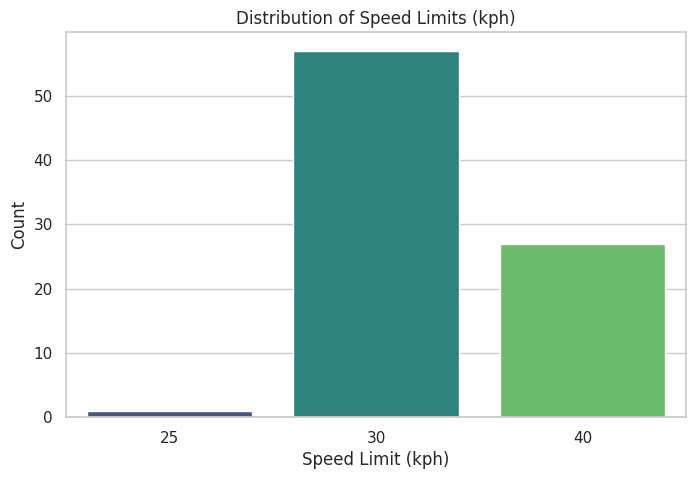

In [ ]:
# Speed Limit Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='speed_limit_kph', palette='viridis')
plt.title('Distribution of Speed Limits (kph)')
plt.xlabel('Speed Limit (kph)')
plt.ylabel('Count')
plt.show()

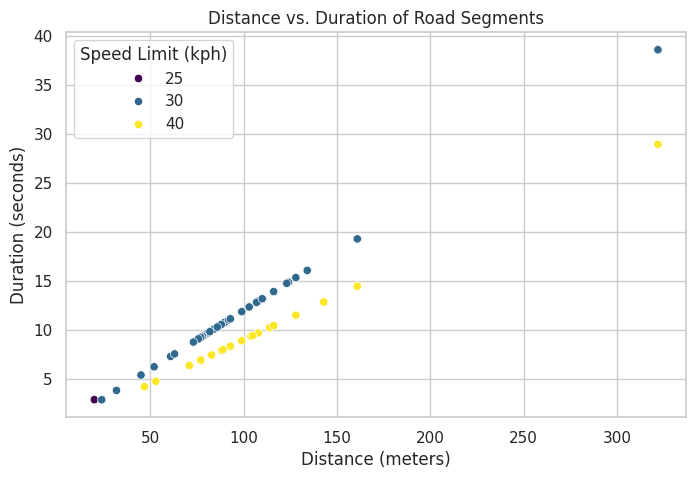

In [ ]:
# Distance vs. Duration
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='distance_meters', y='duration_seconds', hue='speed_limit_kph', palette='viridis')
plt.title('Distance vs. Duration of Road Segments')
plt.xlabel('Distance (meters)')
plt.ylabel('Duration (seconds)')
plt.legend(title='Speed Limit (kph)')
plt.show()

/tmp/ipython-input-10-2686387924.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_signed', palette='viridis')


Text(0, 0.5, 'Count')

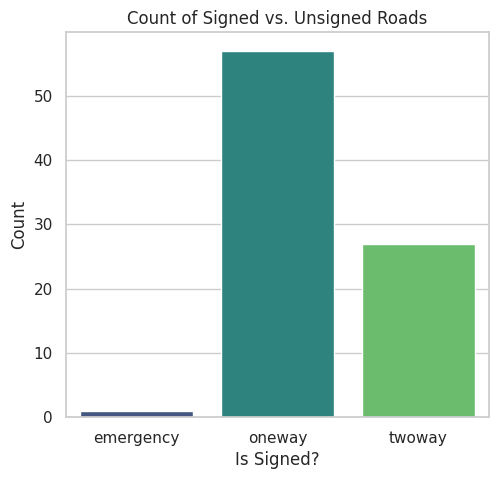

In [ ]:
# Road Type Analysis (is_signed and is_blocked)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='is_signed', palette='viridis')
plt.title('Count of Signed vs. Unsigned Roads')
plt.xlabel('Is Signed?')
plt.ylabel('Count')

/tmp/ipython-input-11-3166851106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_blocked', palette='viridis')


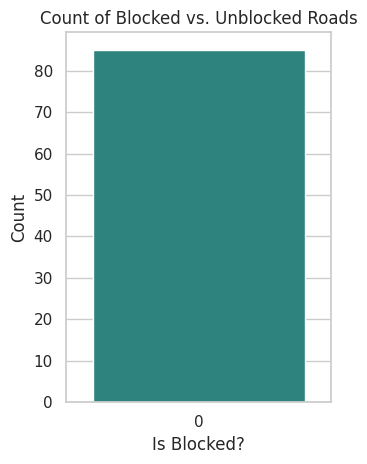

In [ ]:
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='is_blocked', palette='viridis')
plt.title('Count of Blocked vs. Unblocked Roads')
plt.xlabel('Is Blocked?')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

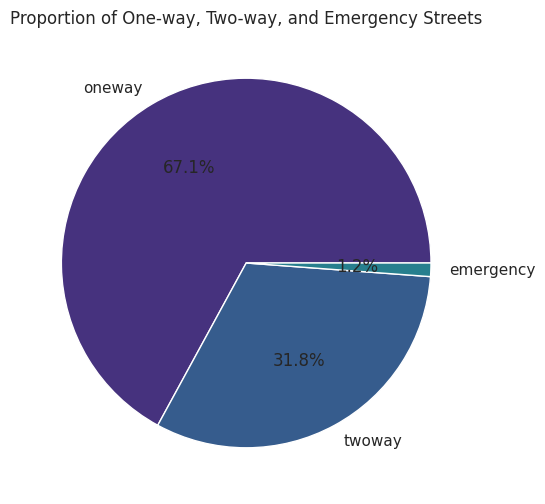

In [ ]:
street_types = df['is_signed'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(street_types, labels=['oneway', 'twoway', 'emergency'], autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Proportion of One-way, Two-way, and Emergency Streets')
plt.show()

In [ ]:
# Data splitting
df['cost'] = df['duration_seconds'] + (df['distance_meters']) + (df['is_blocked'] * 1000)

X = df.drop(columns=['duration_seconds', 'distance_meters', 'is_blocked', 'cost'])  # Features
y = df['cost']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Split successful!")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Split successful!
Training samples: 68
Test samples: 17


In [ ]:
df

,start_node,end_node,speed_limit_kph,distance_meters,duration_seconds,is_signed,is_blocked,cost
0,"(40.817387, -73.925413)","(40.817501, -73.925585)",25,20.1168,2.896819,emergency,0,23.013619
1,"(40.817501, -73.925585)","(40.817980, -73.925216)",30,60.9600,7.315200,oneway,0,68.275200
2,"(40.817980, -73.925216)","(40.819259, -73.924069)",30,160.9340,19.312080,oneway,0,180.246080
3,"(40.819259, -73.924069)","(40.820560, -73.922594)",30,160.9340,19.312080,oneway,0,180.246080
4,"(40.820560, -73.922594)","(40.821551, -73.921220)",30,160.9340,19.312080,oneway,0,180.246080
...,...,...,...,...,...,...,...,...
80,"(40.819369, -73.918289)","(40.820204, -73.921469)",30,321.8690,38.624280,oneway,0,360.493280
81,"(40.822254, -73.920331)","(40.821293, -73.917428)",30,321.8690,38.624280,oneway,0,360.493280
82,"(40.823386, -73.918344)","(40.822825, -73.916582)",30,160.9340,19.312080,oneway,0,180.246080
83,"(40.823472, -73.916221)","(40.823892, -73.917575)",30,123.1390,14.776680,oneway,0,137.915680


Running Dijkstra...
Running A*...
Running Greedy BFS...
Running Ant Colony Optimization...


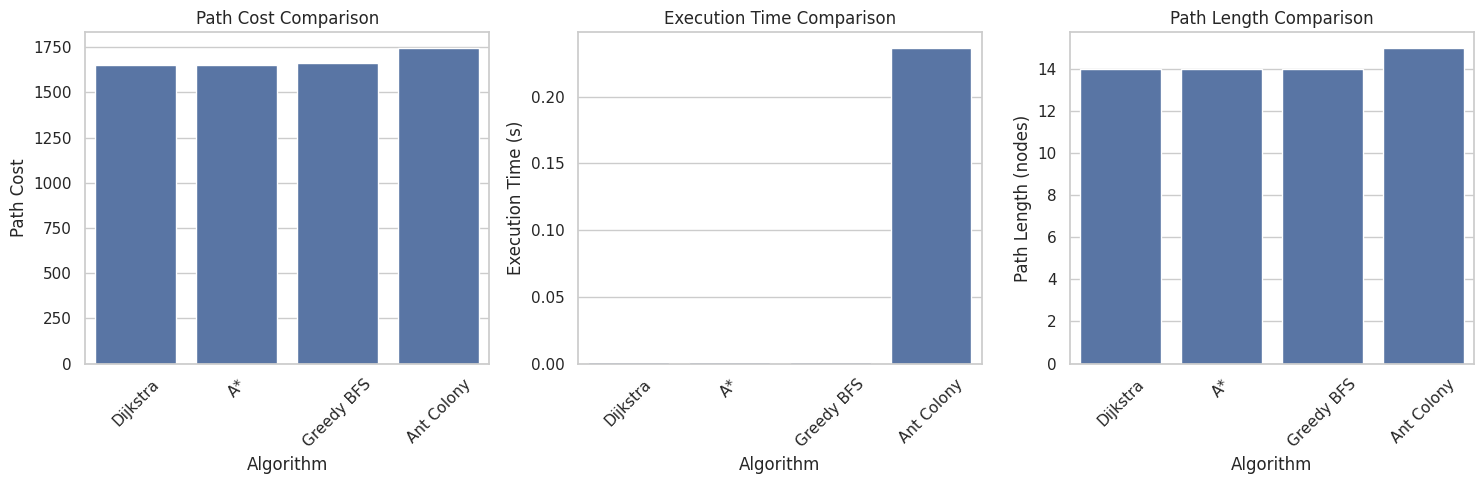


Performance Metrics:
    Algorithm    Path Cost  Execution Time (s)  Path Length (nodes)
0    Dijkstra  1650.876843            0.000832                   14
1          A*  1650.876843            0.001504                   14
2  Greedy BFS  1661.873573            0.001218                   14
3  Ant Colony  1744.812915            0.236524                   15

Visualizing paths...


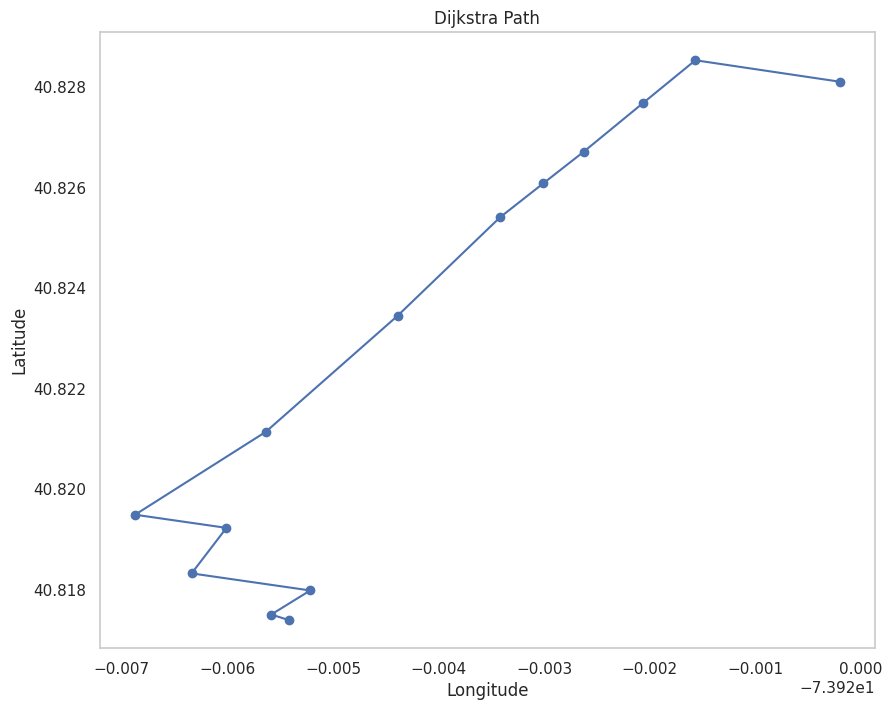

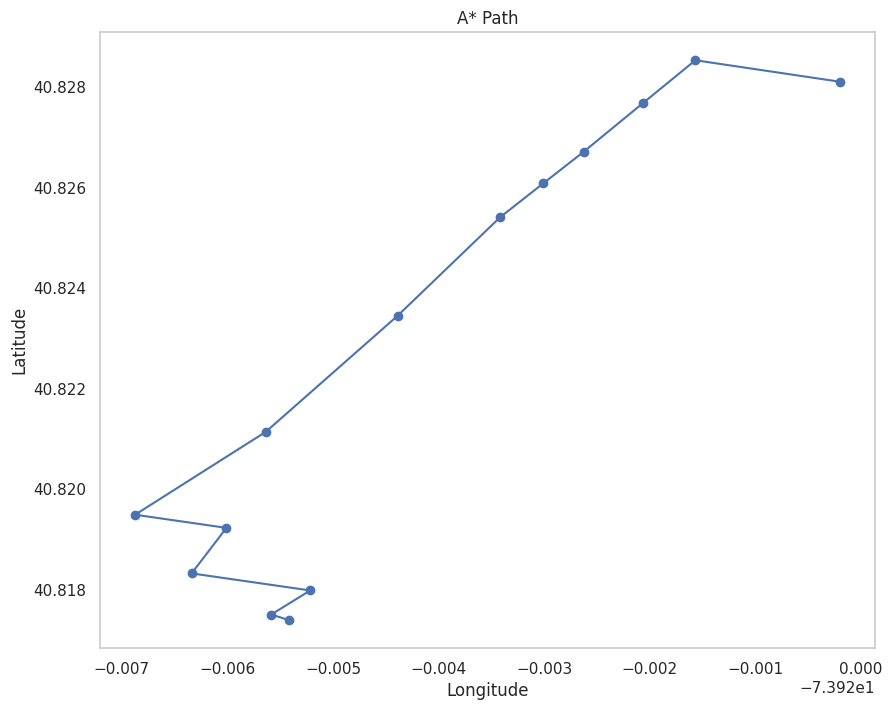

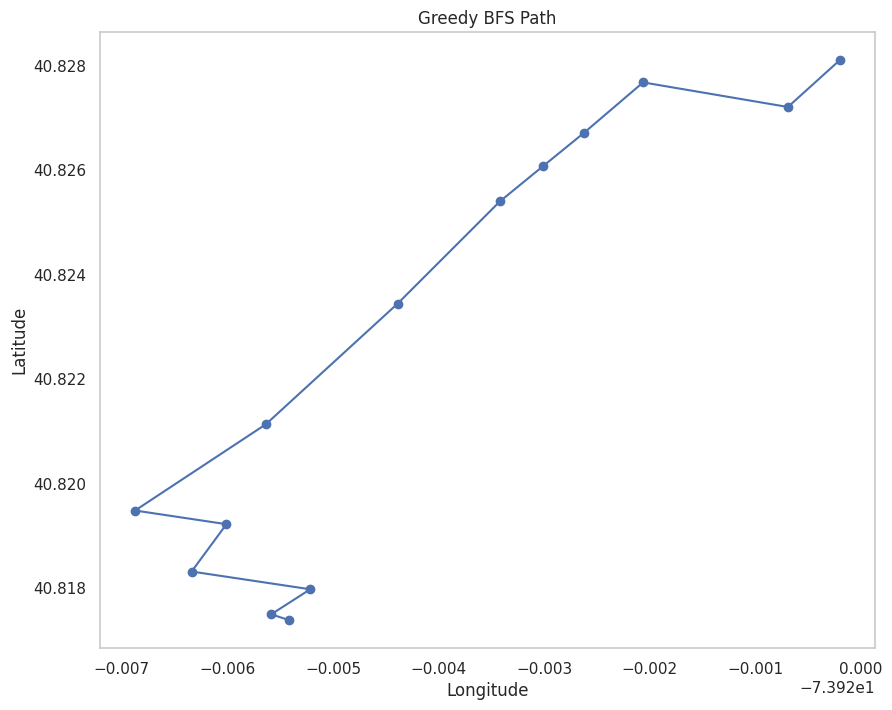

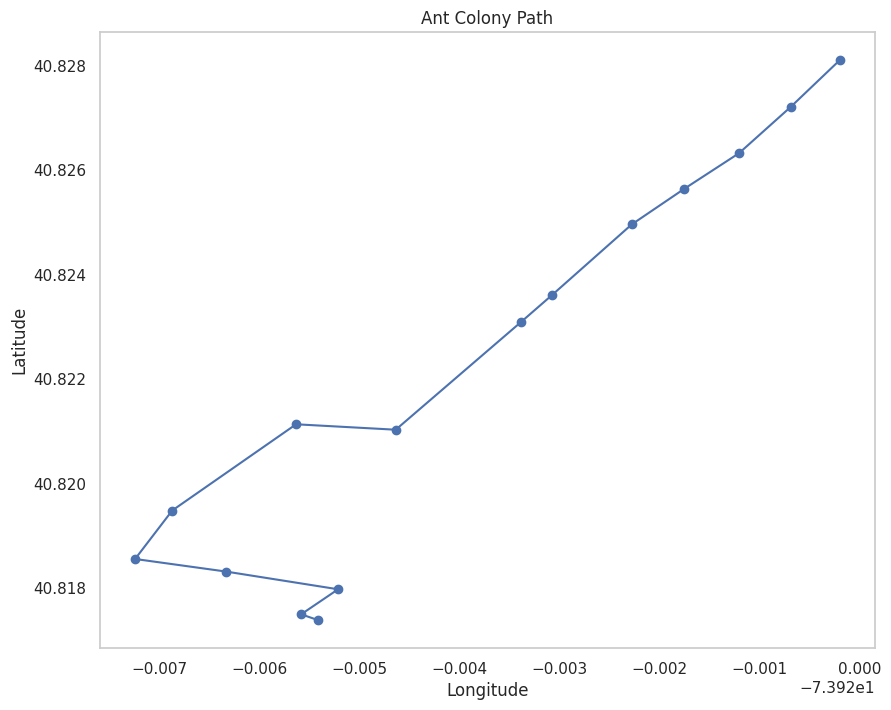

In [ ]:
# Create graph
G = nx.DiGraph() if 'oneway' in df.columns else nx.Graph()

for _, row in df.iterrows():
    G.add_edge(
        row['start_node'],
        row['end_node'],
        weight=row['cost'],
        distance=row['distance_meters'],
        duration=row['duration_seconds'],
        is_blocked=row['is_blocked']
    )

# Heuristic function for A* and Greedy BFS (Euclidean distance)
def heuristic(u, v):
    u_coords = eval(u)
    v_coords = eval(v)
    return sqrt((u_coords[0]-v_coords[0])**2 + (u_coords[1]-v_coords[1])**2)

# Algorithms implementation
def run_dijkstra(G, start, end):
    start_time = time.time()
    path = nx.shortest_path(G, source=start, target=end, weight='weight')
    exec_time = time.time() - start_time
    total_cost = nx.shortest_path_length(G, source=start, target=end, weight='weight')
    return path, total_cost, exec_time

def run_astar(G, start, end):
    start_time = time.time()
    path = nx.astar_path(G, source=start, target=end, heuristic=heuristic, weight='weight')
    exec_time = time.time() - start_time
    total_cost = sum(G[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
    return path, total_cost, exec_time

def run_greedy_bfs(G, start, end):
    start_time = time.time()
    path = nx.astar_path(G, source=start, target=end, heuristic=heuristic, weight=None)
    exec_time = time.time() - start_time
    total_cost = sum(G[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
    return path, total_cost, exec_time

# Fixed Ant Colony Optimization implementation
class AntColony:
    def __init__(self, graph, n_ants=10, n_iterations=50, decay=0.5, alpha=1, beta=2):
        self.graph = graph
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = {(u, v): 1 for u, v in graph.edges()}

    def run(self, start, end):
        start_time = time.time()
        best_path = None
        best_cost = float('inf')

        for _ in range(self.n_iterations):
            paths = []
            costs = []

            for _ in range(self.n_ants):
                path = [start]
                current = start
                visited = set([start])
                dead_end = False

                while current != end and not dead_end:
                    neighbors = list(self.graph.neighbors(current))
                    unvisited = [n for n in neighbors if n not in visited]

                    if not unvisited:
                        dead_end = True
                        break

                    probs = []
                    for neighbor in unvisited:
                        edge = (current, neighbor)
                        if edge not in self.pheromone:
                            self.pheromone[edge] = 1
                        pheromone = self.pheromone[edge] ** self.alpha
                        heuristic_val = (1 / max(0.0001, self.graph[current][neighbor]['weight'])) ** self.beta
                        probs.append(pheromone * heuristic_val)

                    total = sum(probs)
                    if total == 0:
                        probs = [1/len(unvisited)] * len(unvisited)
                    else:
                        probs = [p/total for p in probs]

                    next_node = np.random.choice(unvisited, p=probs)
                    path.append(next_node)
                    visited.add(next_node)
                    current = next_node

                if not dead_end and path[-1] == end:
                    cost = sum(self.graph[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
                    paths.append(path)
                    costs.append(cost)

                    if cost < best_cost:
                        best_path = path
                        best_cost = cost

            for edge in self.pheromone:
                self.pheromone[edge] *= self.decay

            for path, cost in zip(paths, costs):
                for u, v in zip(path[:-1], path[1:]):
                    edge = (u, v)
                    if edge in self.pheromone:
                        self.pheromone[edge] += 1 / max(0.0001, cost)

        exec_time = time.time() - start_time
        return best_path, best_cost, exec_time

# Test the algorithms
start_node = "(40.817387, -73.925413)"
end_node = "(40.828109, -73.920203)"

# Run algorithms
print("Running Dijkstra...")
dijkstra_path, dijkstra_cost, dijkstra_time = run_dijkstra(G, start_node, end_node)

print("Running A*...")
astar_path, astar_cost, astar_time = run_astar(G, start_node, end_node)

print("Running Greedy BFS...")
greedy_path, greedy_cost, greedy_time = run_greedy_bfs(G, start_node, end_node)

print("Running Ant Colony Optimization...")
aco = AntColony(G)
aco_path, aco_cost, aco_time = aco.run(start_node, end_node)

# Performance metrics
metrics = {
    'Algorithm': ['Dijkstra', 'A*', 'Greedy BFS', 'Ant Colony'],
    'Path Cost': [dijkstra_cost, astar_cost, greedy_cost, aco_cost],
    'Execution Time (s)': [dijkstra_time, astar_time, greedy_time, aco_time],
    'Path Length (nodes)': [len(dijkstra_path), len(astar_path), len(greedy_path), len(aco_path)]
}

metrics_df = pd.DataFrame(metrics)

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(data=metrics_df, x='Algorithm', y='Path Cost')
plt.title('Path Cost Comparison')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(data=metrics_df, x='Algorithm', y='Execution Time (s)')
plt.title('Execution Time Comparison')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(data=metrics_df, x='Algorithm', y='Path Length (nodes)')
plt.title('Path Length Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print metrics
print("\nPerformance Metrics:")
print(metrics_df)

# Path visualization function
def plot_path(path, title):
    coords = [eval(node) for node in path]
    plt.figure(figsize=(10, 8))
    plt.plot([c[1] for c in coords], [c[0] for c in coords], 'o-')
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()

# Plot paths
print("\nVisualizing paths...")
plot_path(dijkstra_path, 'Dijkstra Path')
plot_path(astar_path, 'A* Path')
plot_path(greedy_path, 'Greedy BFS Path')
plot_path(aco_path, 'Ant Colony Path')

Starting simulation with dynamic events...

Initial state at time 0:
Blocked edges: []
Dijkstra: SUCCESS | Cost: 1529.40 | Time: 0.0018s | Nodes: 15
A*: SUCCESS | Cost: 1529.40 | Time: 0.0018s | Nodes: 15
Greedy BFS: SUCCESS | Cost: 2019.47 | Time: 0.0019s | Nodes: 14
Ant Colony: SUCCESS | Cost: 1959.90 | Time: 0.3172s | Nodes: 21

Time 5: Handling block event on edges [('(40.820560, -73.922594)', '(40.821551, -73.921220)'), ('(40.821551, -73.921220)', '(40.821518, -73.920868)')]
Current blocked edges: [('(40.820560, -73.922594)', '(40.821551, -73.921220)'), ('(40.821551, -73.921220)', '(40.821518, -73.920868)')]
Dijkstra: SUCCESS | Cost: 1604.12 | Time: 0.0005s | Nodes: 15
A*: SUCCESS | Cost: 1604.12 | Time: 0.0015s | Nodes: 15
Greedy BFS: SUCCESS | Cost: 2094.18 | Time: 0.0014s | Nodes: 14
Ant Colony: SUCCESS | Cost: 1792.52 | Time: 0.2466s | Nodes: 17

Time 10: Handling block event on edges [('(40.823892, -73.917575)', '(40.824393, -73.916772)')]
Current blocked edges: [('(40.820560

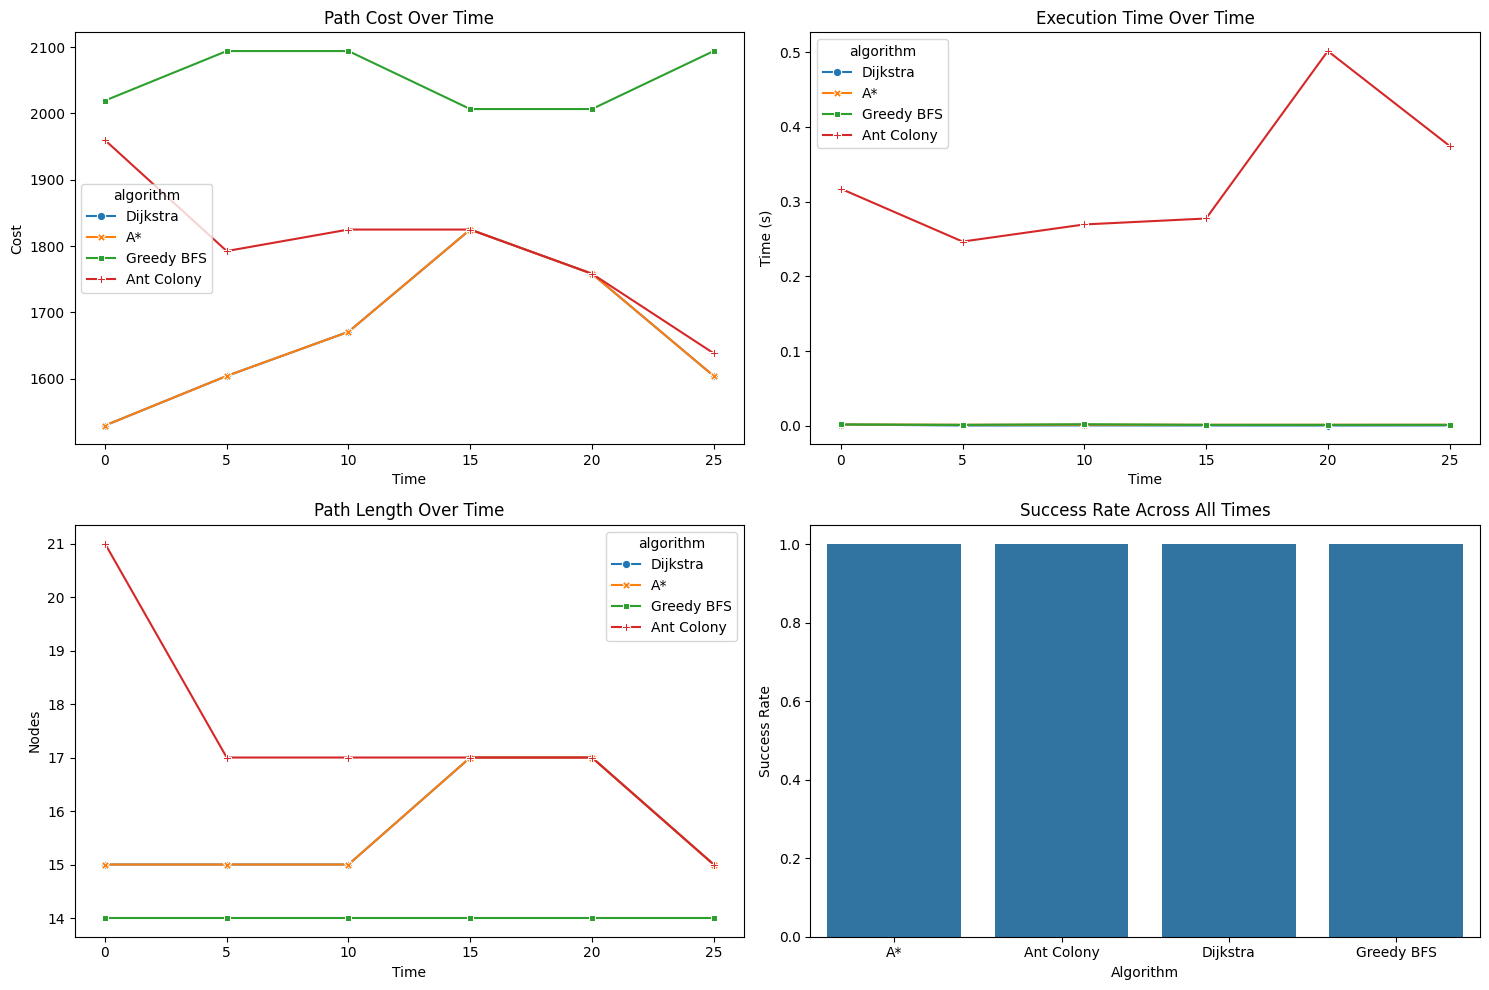

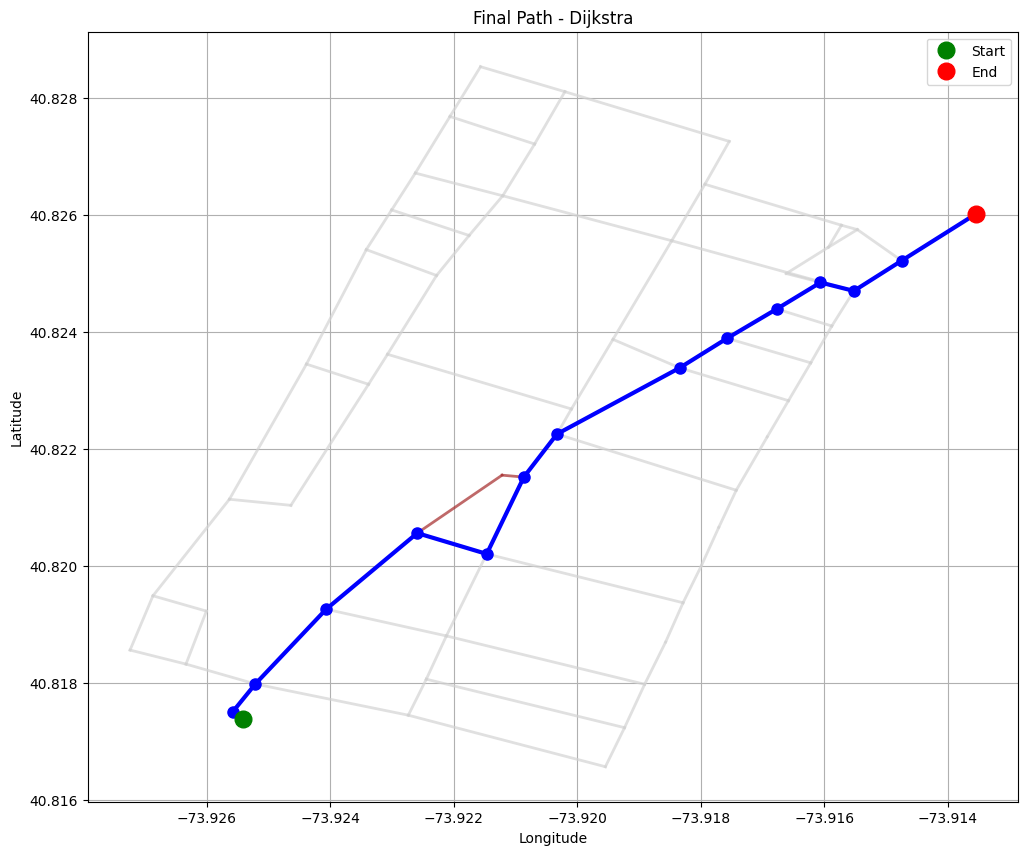

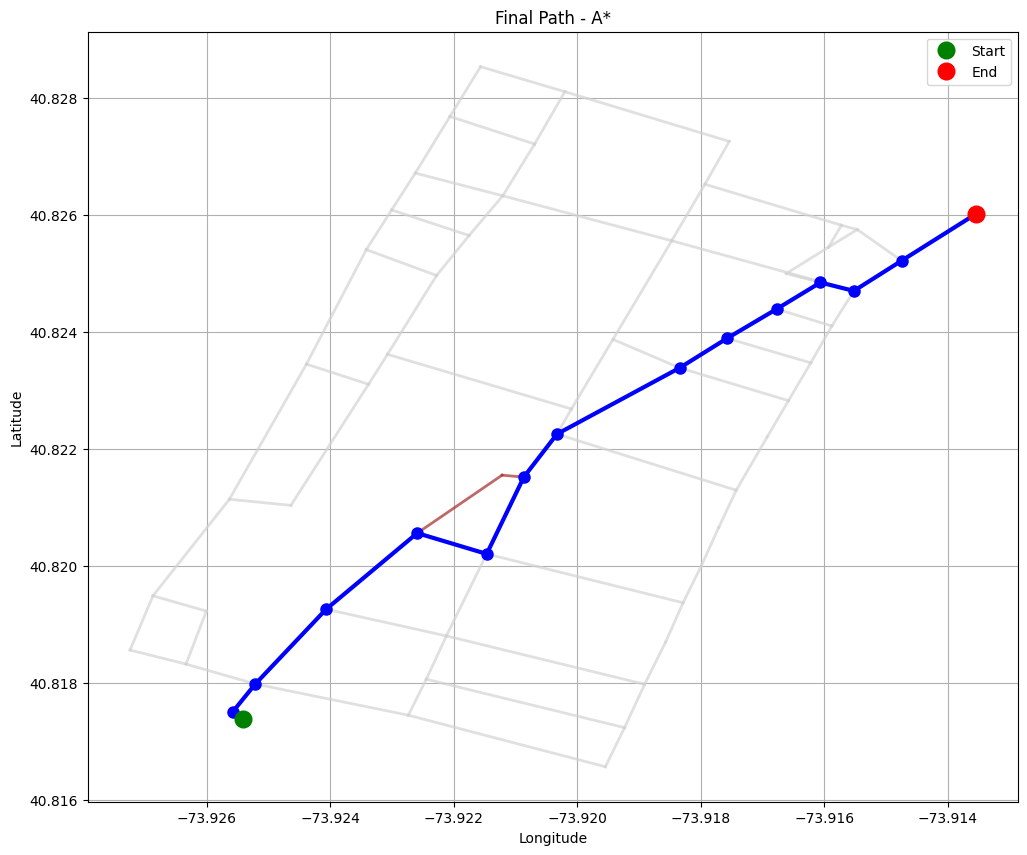

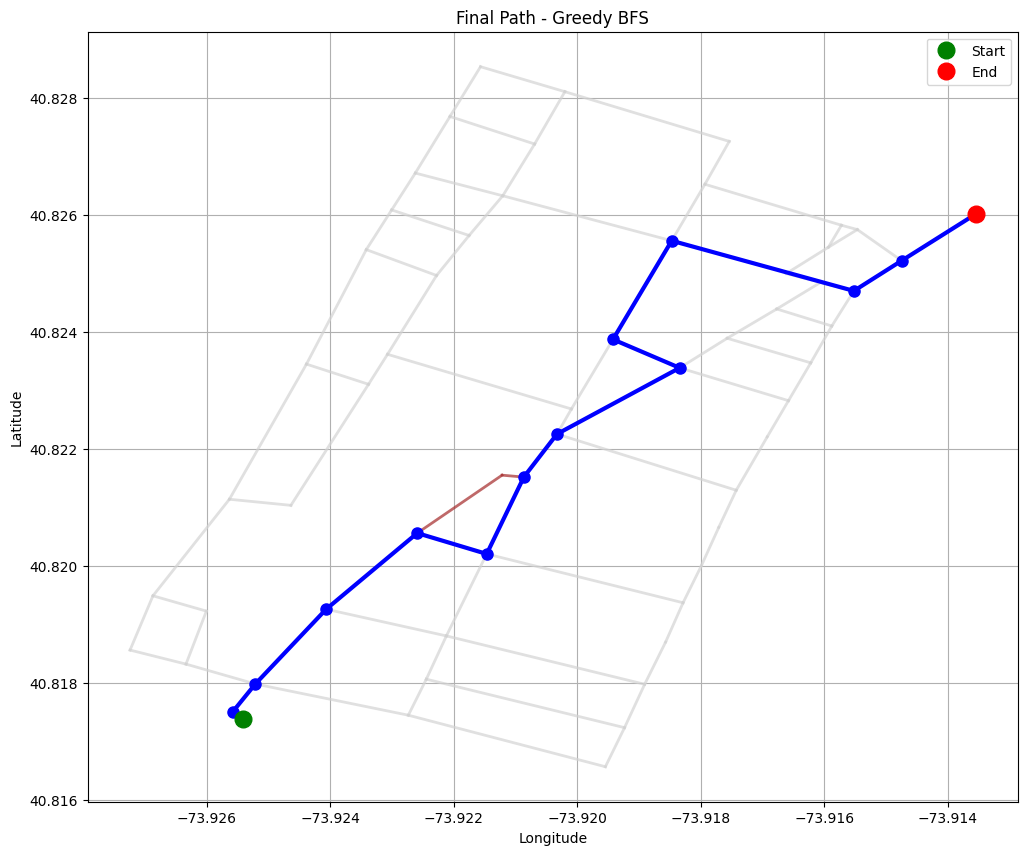

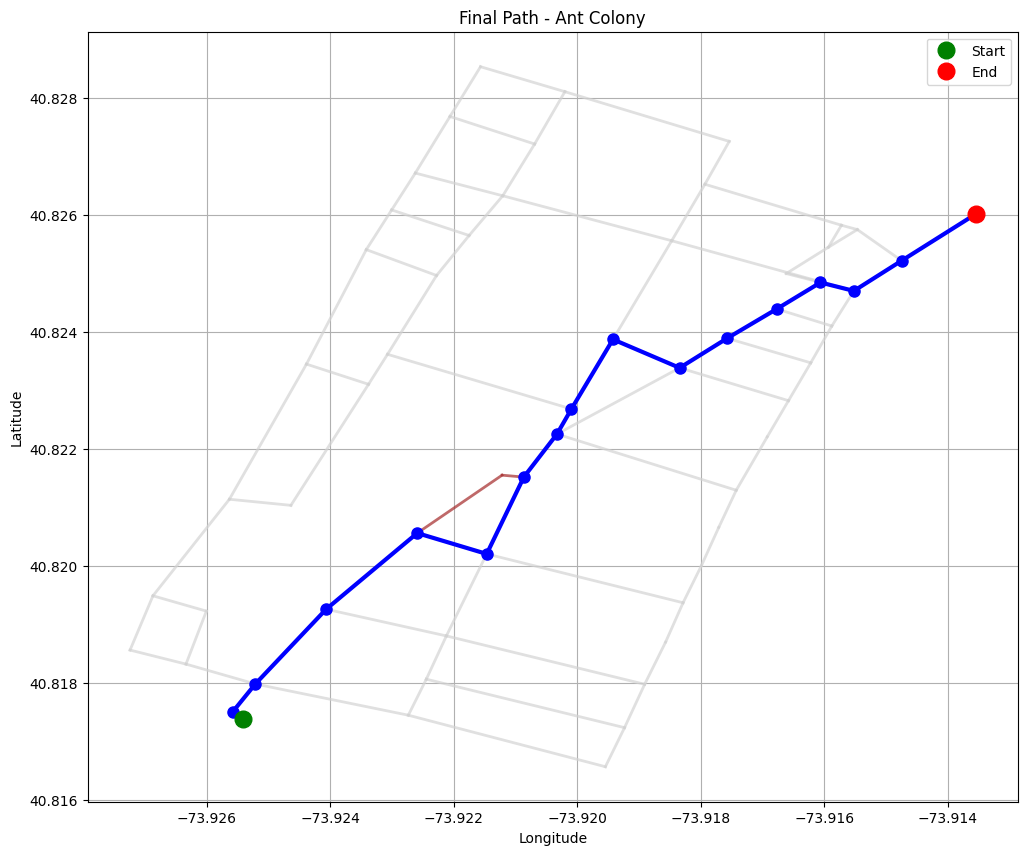

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import time
import heapq
import numpy as np
from math import sqrt
from sklearn.model_selection import train_test_split

# ====================== Data Loading and Preparation ======================
def load_and_prepare_data(filepath):
    """Load and prepare the dataset"""
    df = pd.read_csv(filepath)
    df = df.drop(columns=['paths', 'route'])

    # Calculate cost considering blocked roads
    df['cost'] = df['duration_seconds'] + (df['distance_meters']) + (df['is_blocked'] * 1000)

    return df

# ====================== Graph Construction ======================
def build_graph(df):
    """Build the graph from the dataframe"""
    G = nx.DiGraph() if 'oneway' in df.columns else nx.Graph()

    for _, row in df.iterrows():
        G.add_edge(
            row['start_node'],
            row['end_node'],
            weight=row['cost'],
            distance=row['distance_meters'],
            duration=row['duration_seconds'],
            is_blocked=bool(row['is_blocked']),
            speed_limit=row['speed_limit_kph'],
            original_weight=row['cost']  # Store original weight
        )
    return G

# ====================== Pathfinding Algorithms ======================
def heuristic(u, v):
    """Euclidean distance heuristic for A* and Greedy BFS"""
    u_coords = eval(u)
    v_coords = eval(v)
    return sqrt((u_coords[0]-v_coords[0])**2 + (u_coords[1]-v_coords[1])**2)

def run_dijkstra(G, start, end):
    """Dijkstra's algorithm implementation that respects blocked edges"""
    start_time = time.time()
    try:
        # Create a temporary graph where blocked edges have infinite weight
        temp_G = nx.DiGraph() if isinstance(G, nx.DiGraph) else nx.Graph()
        for u, v, d in G.edges(data=True):
            weight = float('inf') if d.get('is_blocked', False) else d['weight']
            temp_G.add_edge(u, v, weight=weight)

        path = nx.shortest_path(temp_G, source=start, target=end, weight='weight')
        cost = nx.shortest_path_length(temp_G, source=start, target=end, weight='weight')
        exec_time = time.time() - start_time
        return path, cost, exec_time
    except:
        return None, float('inf'), time.time() - start_time

def run_astar(G, start, end):
    """A* algorithm implementation that respects blocked edges"""
    start_time = time.time()
    try:
        # Create a temporary graph where blocked edges have infinite weight
        temp_G = nx.DiGraph() if isinstance(G, nx.DiGraph) else nx.Graph()
        for u, v, d in G.edges(data=True):
            weight = float('inf') if d.get('is_blocked', False) else d['weight']
            temp_G.add_edge(u, v, weight=weight)

        path = nx.astar_path(temp_G, source=start, target=end, heuristic=heuristic, weight='weight')
        cost = sum(temp_G[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
        exec_time = time.time() - start_time
        return path, cost, exec_time
    except:
        return None, float('inf'), time.time() - start_time

def run_greedy_bfs(G, start, end):
    """Greedy Best-First Search implementation that respects blocked edges"""
    start_time = time.time()
    try:
        # Create a temporary graph where blocked edges are removed
        temp_G = nx.DiGraph() if isinstance(G, nx.DiGraph) else nx.Graph()
        for u, v, d in G.edges(data=True):
            if not d.get('is_blocked', False):
                temp_G.add_edge(u, v)

        path = nx.astar_path(temp_G, source=start, target=end, heuristic=heuristic, weight=None)
        cost = sum(G[u][v]['weight'] for u, v in zip(path[:-1], path[1:])) if path else float('inf')
        exec_time = time.time() - start_time
        return path, cost, exec_time
    except:
        return None, float('inf'), time.time() - start_time

class AntColony:
    """Ant Colony Optimization implementation that respects blocked edges"""
    def __init__(self, graph, n_ants=10, n_iterations=50, decay=0.5, alpha=1, beta=2):
        # Create a temporary graph without blocked edges
        self.graph = nx.DiGraph() if isinstance(graph, nx.DiGraph) else nx.Graph()
        for u, v, d in graph.edges(data=True):
            if not d.get('is_blocked', False):
                self.graph.add_edge(u, v, weight=d['weight'])

        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta
        self.pheromone = {(u, v): 1 for u, v in self.graph.edges()}

    def run(self, start, end):
        start_time = time.time()
        best_path = None
        best_cost = float('inf')

        for _ in range(self.n_iterations):
            paths = []
            costs = []

            for _ in range(self.n_ants):
                path = [start]
                current = start
                visited = set([start])
                dead_end = False

                while current != end and not dead_end:
                    neighbors = list(self.graph.neighbors(current))
                    unvisited = [n for n in neighbors if n not in visited]

                    if not unvisited:
                        dead_end = True
                        break

                    probs = []
                    for neighbor in unvisited:
                        edge = (current, neighbor)
                        if edge not in self.pheromone:
                            self.pheromone[edge] = 1
                        pheromone = self.pheromone[edge] ** self.alpha
                        heuristic_val = (1 / max(0.0001, self.graph[current][neighbor]['weight'])) ** self.beta
                        probs.append(pheromone * heuristic_val)

                    total = sum(probs)
                    if total == 0:
                        probs = [1/len(unvisited)] * len(unvisited)
                    else:
                        probs = [p/total for p in probs]

                    next_node = np.random.choice(unvisited, p=probs)
                    path.append(next_node)
                    visited.add(next_node)
                    current = next_node

                if not dead_end and path[-1] == end:
                    cost = sum(self.graph[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
                    paths.append(path)
                    costs.append(cost)

                    if cost < best_cost:
                        best_path = path
                        best_cost = cost

            for edge in self.pheromone:
                self.pheromone[edge] *= self.decay

            for path, cost in zip(paths, costs):
                for u, v in zip(path[:-1], path[1:]):
                    edge = (u, v)
                    if edge in self.pheromone:
                        self.pheromone[edge] += 1 / max(0.0001, cost)

        exec_time = time.time() - start_time
        return best_path, best_cost, exec_time

# ====================== Event Simulation ======================
class Event:
    """Event class for discrete event simulation"""
    def __init__(self, time, event_type, data=None):
        self.time = time
        self.event_type = event_type
        self.data = data

    def __lt__(self, other):
        return self.time < other.time

def handle_event(event, graph):
    """Handle events that modify the graph"""
    if event.event_type == "block":
        for u, v in event.data["edges"]:
            if graph.has_edge(u, v):
                # Mark edge as blocked
                graph[u][v]['is_blocked'] = True
                # Store original weight if not already stored
                if 'original_weight' not in graph[u][v]:
                    graph[u][v]['original_weight'] = graph[u][v]['weight']
                # Set weight to infinity to make it impassable
                graph[u][v]['weight'] = float('inf')

    elif event.event_type == "unblock":
        for u, v in event.data["edges"]:
            if graph.has_edge(u, v):
                # Unblock the edge
                graph[u][v]['is_blocked'] = False
                # Restore original weight if available
                if 'original_weight' in graph[u][v]:
                    graph[u][v]['weight'] = graph[u][v]['original_weight']

def run_simulation(graph, events, start_node, end_node, max_time=100):
    """Run the discrete event simulation with all algorithms"""
    current_time = 0
    heapq.heapify(events)

    # Initialize results storage
    results = []

    # Initial state
    initial_blocked = [(u, v) for u, v, d in graph.edges(data=True) if d.get('is_blocked', False)]
    print(f"\nInitial state at time {current_time}:")
    print(f"Blocked edges: {initial_blocked}")

    # Run initial pathfinding with all algorithms
    initial_results = evaluate_algorithms(graph, start_node, end_node, current_time)
    results.extend(initial_results)

    # Event loop
    while events and current_time <= max_time:
        event = heapq.heappop(events)
        current_time = event.time

        print(f"\nTime {current_time}: Handling {event.event_type} event on edges {event.data['edges']}")
        handle_event(event, graph)

        # Get current blocked edges
        blocked_edges = [(u, v) for u, v, d in graph.edges(data=True) if d.get('is_blocked', False)]
        print(f"Current blocked edges: {blocked_edges}")

        # Evaluate all algorithms after event
        event_results = evaluate_algorithms(graph, start_node, end_node, current_time)
        results.extend(event_results)

    return pd.DataFrame(results)

def evaluate_algorithms(graph, start, end, current_time):
    """Evaluate all pathfinding algorithms at a given time"""
    algorithms = {
        'Dijkstra': run_dijkstra,
        'A*': run_astar,
        'Greedy BFS': run_greedy_bfs,
        'Ant Colony': lambda G, s, e: AntColony(G).run(s, e)
    }

    results = []

    for name, algorithm in algorithms.items():
        path, cost, exec_time = algorithm(graph, start, end)

        result = {
            'time': current_time,
            'algorithm': name,
            'path_length': len(path) if path else 0,
            'cost': cost,
            'execution_time': exec_time,
            'path_found': path is not None
        }
        results.append(result)

        status = "SUCCESS" if path else "FAILED"
        print(f"{name}: {status} | Cost: {cost:.2f} | Time: {exec_time:.4f}s | Nodes: {len(path) if path else 0}")

    return results

# ====================== Visualization ======================
def plot_metrics(results_df):
    """Plot performance metrics over time"""
    plt.figure(figsize=(15, 10))

    # Cost comparison
    plt.subplot(2, 2, 1)
    sns.lineplot(data=results_df, x='time', y='cost', hue='algorithm', style='algorithm',
                 markers=True, dashes=False)
    plt.title('Path Cost Over Time')
    plt.ylabel('Cost')
    plt.xlabel('Time')

    # Execution time comparison
    plt.subplot(2, 2, 2)
    sns.lineplot(data=results_df, x='time', y='execution_time', hue='algorithm', style='algorithm',
                 markers=True, dashes=False)
    plt.title('Execution Time Over Time')
    plt.ylabel('Time (s)')
    plt.xlabel('Time')

    # Path length comparison
    plt.subplot(2, 2, 3)
    sns.lineplot(data=results_df, x='time', y='path_length', hue='algorithm', style='algorithm',
                 markers=True, dashes=False)
    plt.title('Path Length Over Time')
    plt.ylabel('Nodes')
    plt.xlabel('Time')

    # Success rate
    plt.subplot(2, 2, 4)
    success_rates = results_df.groupby('algorithm')['path_found'].mean().reset_index()
    sns.barplot(data=success_rates, x='algorithm', y='path_found')
    plt.title('Success Rate Across All Times')
    plt.ylabel('Success Rate')
    plt.xlabel('Algorithm')

    plt.tight_layout()
    plt.show()

def plot_path(path, title, graph):
    """Visualize a path on the graph with blocked edges highlighted"""
    if not path:
        print(f"No path to visualize for {title}")
        return

    coords = [eval(node) for node in path]
    plt.figure(figsize=(12, 10))

    # Plot all edges first
    for u, v, d in graph.edges(data=True):
        u_coords = eval(u)
        v_coords = eval(v)
        color = 'brown' if d.get('is_blocked', False) else 'lightgray'
        plt.plot([u_coords[1], v_coords[1]], [u_coords[0], v_coords[0]], color=color, alpha=0.7, linewidth=2)

    # Plot the path on top
    path_coords = [eval(node) for node in path]
    plt.plot([c[1] for c in path_coords], [c[0] for c in path_coords], 'o-', color='blue', linewidth=3, markersize=8)

    # Add start and end markers
    start_coords = eval(path[0])
    end_coords = eval(path[-1])
    plt.plot(start_coords[1], start_coords[0], 'go', markersize=12, label='Start')
    plt.plot(end_coords[1], end_coords[0], 'ro', markersize=12, label='End')

    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.grid()
    plt.show()

# ====================== Main Execution ======================
def main():
    # Load and prepare data
    df = load_and_prepare_data("Updated_Speed_Limits_with_Duration.csv")

    # Build graph
    G = build_graph(df)

    # Define start and end nodes
    start_node = "(40.817387, -73.925413)"
    end_node = "(40.826014, -73.913553)"

    # Create event queue
    event_queue = [
        Event(5, "block", {"edges": [
            ("(40.820560, -73.922594)", "(40.821551, -73.921220)"),
            ("(40.821551, -73.921220)", "(40.821518, -73.920868)")
        ]}),
        Event(10, "block", {"edges": [("(40.823892, -73.917575)", "(40.824393, -73.916772)")]}),
        Event(15, "block", {"edges": [("(40.822254, -73.920331)", "(40.823386, -73.918344)")]}),
        Event(20, "unblock", {"edges": [("(40.823892, -73.917575)", "(40.824393, -73.916772)")]}),
        Event(25, "unblock", {"edges": [("(40.822254, -73.920331)", "(40.823386, -73.918344)")]})
    ]

    # Run simulation
    print("Starting simulation with dynamic events...")
    results_df = run_simulation(G, event_queue, start_node, end_node, max_time=30)

    # Plot metrics
    plot_metrics(results_df)

    # Show final paths from each algorithm
    final_time = results_df['time'].max()
    final_results = results_df[results_df['time'] == final_time]

    for _, row in final_results.iterrows():
        if row['path_found']:
            # Get the actual path found by the algorithm (simplified for demo)
            if row['algorithm'] == 'Dijkstra':
                path, _, _ = run_dijkstra(G, start_node, end_node)
            elif row['algorithm'] == 'A*':
                path, _, _ = run_astar(G, start_node, end_node)
            elif row['algorithm'] == 'Greedy BFS':
                path, _, _ = run_greedy_bfs(G, start_node, end_node)
            elif row['algorithm'] == 'Ant Colony':
                path, _, _ = AntColony(G).run(start_node, end_node)
            else:
                path = None
                print(f"No path found for {row['algorithm']}")

            if path:
                plot_path(path, f"Final Path - {row['algorithm']}", G)

if __name__ == "__main__":
    main()